https://googleapis.dev/python/bigquery/latest/usage/pandas.html

https://docs.python.org/3/tutorial/

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = ("https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv")

In [ ]:
tips = pd.read_csv(url)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Większość operacji pand zwraca kopie Series/ DataFrame. Aby zmiany „przykleiły się”, musisz albo przypisać do nowej zmiennej:

In [ ]:
sorted_df = tips.sort_values("total_bill")
sorted_df.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


lub nadpisz oryginalny:

In [ ]:
tips = tips.sort_values("total_bill")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


Select

In [ ]:
%%bigquery
SELECT total_bill, tip, smoker, time
FROM tips;

W przypadku pand wybór kolumn odbywa się poprzez przekazanie listy nazw kolumn do ramki DataFrame:

In [ ]:
tips[["total_bill", "tip", "smoker", "time"]]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


W SQL możesz dodać kolumnę obliczeniową:

In [ ]:
%%bigquery
SELECT *, tip/total_bill as tip_rate
FROM tips;

W przypadku pand możesz użyć DataFrame.assign()metody DataFrame, aby dołączyć nową kolumnę:

In [ ]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"])

,total_bill,tip,sex,smoker,day,time,size,tip_rate
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
92,5.75,1.00,Female,Yes,Fri,Dinner,2,0.173913
111,7.25,1.00,Female,No,Sat,Dinner,1,0.137931
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
...,...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220


Where

In [ ]:
%%bigquery
SELECT *
FROM tips
WHERE time = 'Dinner';

DataFrames można filtrować na wiele sposobów; najbardziej intuicyjna z nich to indeksowanie logiczne.

In [ ]:
tips[tips['total_bill'] > 10] 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Powyższe stwierdzenie jest po prostu przepuszczenie Series True/ False obiektów do DataFrame, wracając wszystkie wiersze z True.

In [ ]:
is_dinner = tips["time"] == "Dinner"
is_dinner.head()

0    True
1    True
2    True
3    True
4    True
Name: time, dtype: bool

In [ ]:
is_dinner.value_counts()

True     176
False     68
Name: time, dtype: int64

In [ ]:
tips[is_dinner]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Podobnie jak SQL OR i AND, wiele warunków można przekazać do DataFrame za pomocą | ( OR) i &( AND).

Napiwki powyżej 5 USD na posiłki obiadowe:

In [ ]:
%%bigquery
SELECT *
FROM tips
WHERE time = 'Dinner' AND tip > 5.00;

In [ ]:
tips5 = tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)]
tips5.head()

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


Napiwki od stron z co najmniej 5 kolacjami LUB suma rachunku wyniosła ponad 45 USD:

In [ ]:
%%bigquery
SELECT *
FROM tips
WHERE size >= 5 OR total_bill > 45;

In [ ]:
tips[(tips["size"] >= 5) | (tips["total_bill"] > 45)]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
185,20.69,5.00,Male,No,Sun,Dinner,5


Sprawdzanie NULL odbywa się za pomocą metod notna()i isna().

In [ ]:
frame = pd.DataFrame({"col1": ["A", "B", np.NaN, "C", "D"], "col2": ["F", np.NaN, "G", "H", "I"]})

frame

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


Załóżmy, że mamy tabelę o tej samej strukturze, co nasz DataFrame powyżej. Widzimy tylko rekordy, w których col2JEST NULL z następującym zapytaniem:

In [ ]:
%%bigquery

SELECT *
FROM frame
WHERE col2 IS NULL;

In [ ]:
frame[frame['col2'].isna()]

,col1,col2
1,B,NaN


Pobieranie elementów, dla których col1NIE JEST NULL, można wykonać za pomocą notna().

In [ ]:
%%bigquery

SELECT *
FROM frame
WHERE col1 IS NOT NULL;

In [ ]:
frame[frame['col1'].notna()]

,col1,col2
0,A,F
1,B,NaN
3,C,H
4,D,I


Group By

In [ ]:
%%bigquery

SELECT sex, count(*)
FROM tips
GROUP BY sex;
/*
Female     87
Male      157
*/

In [ ]:
tips.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

Zauważ, że w kodzie pand użyliśmy size()i nie count(). Dzieje się tak, ponieważ count()stosuje funkcję do każdej kolumny, zwracając liczbę rekordów w każdej kolumnie .NOT NULL

In [ ]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


Alternatywnie moglibyśmy zastosować tę count()metodę do pojedynczej kolumny:

In [ ]:
tips.groupby('sex')['total_bill'].count()

sex
Female     87
Male      157
Name: total_bill, dtype: int64

Można również zastosować wiele funkcji jednocześnie. Załóżmy na przykład, że chcielibyśmy zobaczyć, jak wysokość napiwków różni się w zależności od dnia tygodnia — agg()pozwala przekazać słownik do zgrupowanej ramki DataFrame, wskazując, które funkcje należy zastosować do określonych kolumn.

In [ ]:
%%bigquery

SELECT day, AVG(tip), COUNT(*)
FROM tips
GROUP BY day;
/*
Fri   2.734737   19
Sat   2.993103   87
Sun   3.255132   76
Thu  2.771452   62
*/

In [ ]:
tips.groupby("day").agg({"tip": np.mean, "day": np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


Grupowanie według więcej niż jednej kolumny odbywa się poprzez przekazanie do groupby()metody listy kolumn .

In [ ]:
%%bigquery

SELECT smoker, day, COUNT(*), AVG(tip)
FROM tips
GROUP BY smoker, day;
/*
smoker day
No     Fri      4  2.812500
       Sat     45  3.102889
       Sun     57  3.167895
       Thu    45  2.673778
Yes    Fri     15  2.714000
       Sat     42  2.875476
       Sun     19  3.516842
       Thu    17  3.030000
*/

In [ ]:
tips.groupby(["smoker", "day"]).agg({"tip": [np.size, np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

Join

In [ ]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": np.random.randn(4)})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})

Inner Join

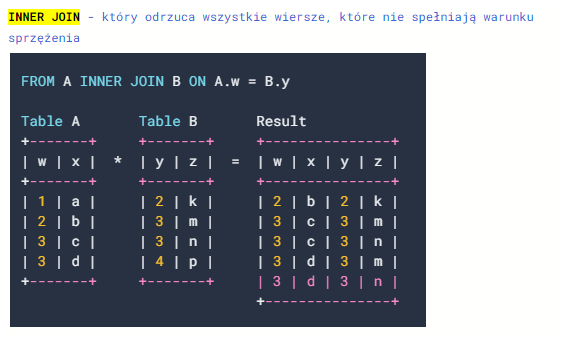

In [ ]:
%%bigquery

SELECT *
FROM df1
INNER JOIN df2
  ON df1.key = df2.key;

In [ ]:
pd.merge(df1, df2, on="key")

,key,value_x,value_y
0,B,-1.983313,0.601832
1,D,1.768226,2.885180
2,D,1.768226,1.247341


Left Join

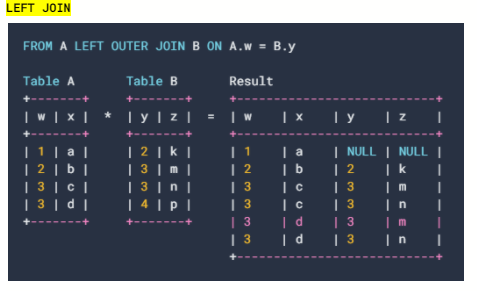

In [ ]:
%%bigquery

SELECT *
FROM df1
LEFT OUTER JOIN df2
  ON df1.key = df2.key;

In [ ]:
pd.merge(df1, df2, on="key", how="left")

,key,value_x,value_y
0,A,0.652079,NaN
1,B,-1.983313,0.601832
2,C,-0.178395,NaN
3,D,1.768226,2.885180
4,D,1.768226,1.247341


Right Join

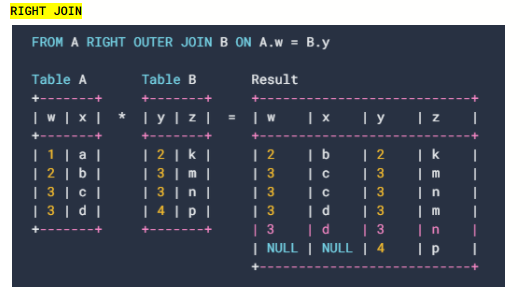

In [ ]:
%%bigquery

SELECT *
FROM df1
RIGHT OUTER JOIN df2
  ON df1.key = df2.key;

In [ ]:
pd.merge(df1, df2, on="key", how="right")

,key,value_x,value_y
0,B,-1.983313,0.601832
1,D,1.768226,2.885180
2,D,1.768226,1.247341
3,E,NaN,-0.648625


Full Join

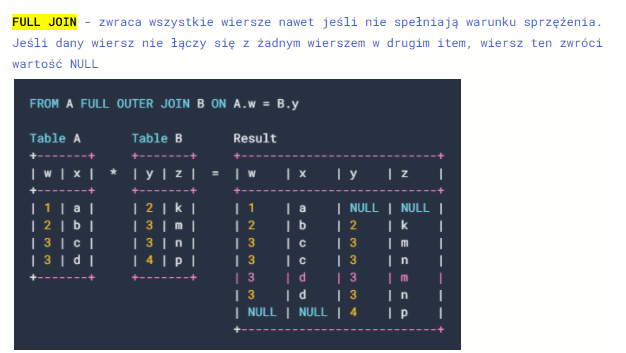

In [ ]:
%%bigquery

SELECT *
FROM df1
FULL OUTER JOIN df2
  ON df1.key = df2.key;

In [ ]:
pd.merge(df1, df2, on="key", how="outer")

,key,value_x,value_y
0,A,0.652079,NaN
1,B,-1.983313,0.601832
2,C,-0.178395,NaN
3,D,1.768226,2.885180
4,D,1.768226,1.247341
5,E,NaN,-0.648625


Union

In [ ]:
df1 = pd.DataFrame(
   {"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)}) 

In [ ]:
df2 = pd.DataFrame(
   {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})

In [ ]:
%%bigquery

SELECT city, rank
FROM df1
UNION ALL
SELECT city, rank
FROM df2;
/*
         city  rank
      Chicago     1
San Francisco     2
New York City     3
      Chicago     1
       Boston     4
  Los Angeles     5
*/

In [ ]:
pd.concat([df1, df2])

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
0,Chicago,1
1,Boston,4
2,Los Angeles,5


SQL UNION jest podobny, jednak usuwa zduplikowane wiersze.

In [ ]:
%%bigquery

SELECT city, rank
FROM df1
UNION
SELECT city, rank
FROM df2;
-- notice that there is only one Chicago record this time
/*
         city  rank
      Chicago     1
San Francisco     2
New York City     3
       Boston     4
  Los Angeles     5
*/

In [ ]:
pd.concat([df1, df2]).drop_duplicates()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


LIMIT

In [ ]:
%%bigquery

SELECT * FROM tips
LIMIT 10;

In [ ]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Funkcje analityczne

N górnych wierszy z przesunięciem


In [ ]:
%%bigquery

-- MySQL
SELECT * FROM tips
ORDER BY tip DESC
LIMIT 10 OFFSET 5;

In [ ]:
tips.nlargest(10 + 5, columns="tip").tail(10)

,total_bill,tip,sex,smoker,day,time,size
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4


n pierwszych wierszy na grupę

In [ ]:
%%bigquery

-- Oracle's ROW_NUMBER() analytic function
SELECT * FROM (
  SELECT
    t.*,
    ROW_NUMBER() OVER(PARTITION BY day ORDER BY total_bill DESC) AS rn
  FROM tips t
)
WHERE rn < 3
ORDER BY day, rn;

In [ ]:
 (
        tips.assign(
            rn=tips.sort_values(["total_bill"], ascending=False)
            .groupby(["day"])
            .cumcount()
            + 1
        )
        .query("rn < 3")
        .sort_values(["day", "rn"])
 )

,total_bill,tip,sex,smoker,day,time,size,rn
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1
90,28.97,3.00,Male,Yes,Fri,Dinner,2,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1
212,48.33,9.00,Male,No,Sat,Dinner,4,2
156,48.17,5.00,Male,No,Sun,Dinner,6,1
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4,1
142,41.19,5.00,Male,No,Thur,Lunch,5,2
